### <font color='darkred'> HW5
    
* Use the dataset, "Hitters.csv", posted on BB to explain/predict a baseball player’s salary <u> using a subset of covariates in the dataset </u>.
    
* In order to select a subset of covariates, do the following:
    - Forward and backward stepwise selections based on AIC and BIC
    - LASSO Estimations with CV, AIC and BIC
    - Produce tables or figures or both to summarize your results
    
* For this exercise, you need to take care of missing values and also generate dummies for some variables

In [3]:
# Import packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


# Read data
raw0 =pd.read_csv('../data/Hitters.csv')

# Convert variables to dummies
raw0 = pd.get_dummies(raw0.iloc[:,1:])

# Drop rows with NaN
raw_data = raw0.dropna()

col_names = raw0.columns

X_col = list(col_names[:16]) + list(col_names[17:])
Y_col = 'Salary'

In [4]:
print(raw_data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  ...  \
1    315    81      7    24   38     39     14    3449    835      69  ...   
2    479   130     18    66   72     76      3    1624    457      63  ...   
3    496   141     20    65   78     37     11    5628   1575     225  ...   
4    321    87     10    39   42     30      2     396    101      12  ...   
5    594   169      4    74   51     35     11    4408   1133      19  ...   

   PutOuts  Assists  Errors  Salary  League_A  League_N  Division_E  \
1      632       43      10   475.0         0         1           0   
2      880       82      14   480.0         1         0           0   
3      200       11       3   500.0         0         1           1   
4      805       40       4    91.5         0         1           1   
5      282      421      25   750.0         1         0           0   

   Division_W  NewLeague_A  NewLeague_N  
1           1            0            1  
2           1       

## <font color='Blue'> Forward Selection and Backward Selection 

In [5]:
# Import packages
import statsmodels.api as sm

# Initalize variables
Y = raw_data[Y_col].values
X = raw_data[X_col].values
ncol = ncol=X.shape[1]

### Forward Selection BIC

In [6]:
pcand = list(range(ncol)) # A list to keep track of the set of predictors left to add to the model at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model at each iteration
p = 0 # Iteration idex

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store Rsquare(s) and BIC(s) of the models under consideration at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [7]:
# Model selected 
psel_forward = psel.copy()
tb_forward = tb.copy()

model_selected_forward_bic = psel_forward[:(np.argmin(tb)+1)]
BIC_forward = min(tb)
model_selected_var_names_forward_bic = [raw_data.columns[x] for x in model_selected_forward_bic]

### Forward Selection AIC

In [8]:
pcand = list(range(ncol)) # A list to keep track of the set of predictors left to add to the model at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model at each iteration
p = 0 # Iteration idex

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store Rsquare(s) and BIC(s) of the models under consideration at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.aic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [9]:
# Model selected 
psel_forward = psel.copy()
tb_forward = tb.copy()

model_selected_forward_aic = psel_forward[:(np.argmin(tb)+1)]
AIC_forward = min(tb)
model_selected_var_names_forward_aic = [X_col[x] for x in model_selected_forward_aic]

### Backward Selection BIC

In [10]:
pcand = list(range(ncol)) 
psel = [] 
tb = np.zeros(ncol) 
p = 0 

while len(psel) != ncol: 
    tb0 = np.zeros((len(pcand),2)) 

    for i in range(0,len(pcand)):
        psel0 = pcand.copy() # line 1
        psel0.remove(psel0[i]) # line 2
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        res = sm.OLS(Y, XX).fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) 
    psel = psel + [pcand[ind]] 
    pcand.remove(pcand[ind]) 
    tb[p] =  tb0[ind,1] 
    p += 1

In [11]:
# Model selected 
psel_backward = psel.copy()
tb_backward = tb.copy()

model_selected_backward = psel_backward[np.argmin(tb):]
BIC_forward = min(tb)
model_selected_var_names_backward_bic = [X_col[x] for x in model_selected_backward]

### Backward Selection BIC

In [12]:
pcand = list(range(ncol)) 
psel = [] 
tb = np.zeros(ncol) 
p = 0 

while len(psel) != ncol: 
    tb0 = np.zeros((len(pcand),2)) 

    for i in range(0,len(pcand)):
        psel0 = pcand.copy() # line 1
        psel0.remove(psel0[i]) # line 2
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        res = sm.OLS(Y, XX).fit()
        tb0[i,:] = [res.rsquared, res.aic]
    
    ind = np.argmax(tb0[:,0]) 
    psel = psel + [pcand[ind]] 
    pcand.remove(pcand[ind]) 
    tb[p] =  tb0[ind,1] 
    p += 1

In [13]:
# Model selected 
psel_backward = psel.copy()
tb_backward = tb.copy()

model_selected_backward_aic = psel_backward[np.argmin(tb):]
AIC_backward = min(tb)
model_selected_var_names_backward_aic = [X_col[x] for x in model_selected_backward]

## <font color='Blue'> LASSO Selection

In [14]:
# Import packages
from sklearn.linear_model import LassoLarsCV, LassoLarsIC
from sklearn import linear_model

# Initalize variables
Y = raw_data[Y_col].values
X = raw_data[X_col].values 
eps = 1e-10

# Standardize Values
from sklearn.preprocessing import StandardScaler

X_no_scale = X.copy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### CV

In [15]:
lascv = LassoLarsCV(cv=5).fit(X, Y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=1.213e+00, with an active set of 8 regressors, 

In [16]:
alpha = lascv.alpha_

In [17]:
las = linear_model.Lasso(alpha=alpha).fit(X,Y) # alpha is the tuning parameter

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.332e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### BIC and AIC

In [18]:
lasic_bic = LassoLarsIC(criterion='bic').fit(X, Y)
lasic_aic = LassoLarsIC(criterion='aic').fit(X, Y)

# Access the Lasso estimates at the alpha selected by AIC and BIC
lasso_aic = lasic_aic.coef_
lasso_bic = lasic_bic.coef_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=2.860e-02, with an active set of 17 regressors,

## <font color='Blue'> Summary

In [19]:
# Summary for Lasso CV
print('Lasso CV tuned coefficients')
for index, name in enumerate(X_col):
    print(f'{name}: {las.coef_[index]}')


# Summary for Lasso AIC
print('\nLasso AIC coefficients')
for index, name in enumerate(X_col):
    print(f'{name}: {lasso_aic[index]}') 

# Summary for Lasso BIC
print('\nLasso BIC coefficients')
for index, name in enumerate(X_col):
    print(f'{name}: {lasso_bic[index]}')

# Summary for Forwards selection
print('\nVariables Selected using Forwards Selection with BIC')
print(model_selected_var_names_forward_bic)
print(f'BIC score: {BIC_forward}')

print('\nVariables Selected Forwards Selection using AIC')
print(model_selected_var_names_forward_aic)
print(f'AIC score: {AIC_forward}')

# Summary for Backwards selection
print('\nVariables Selected Backwards Selection using BIC')
print(model_selected_var_names_backward_bic)
print(f'BIC score: {BIC_forward}')

print('\nVariables Selected Backwards Selection using AIC')
print(model_selected_var_names_backward_aic)
print(f'AIC score: {AIC_forward}')


Lasso CV tuned coefficients
AtBat: -289.68015553142163
Hits: 326.13334412407454
HmRun: 24.678012386498484
Runs: -47.52927346140862
RBI: -12.523098402873481
Walks: 129.3901222583898
Years: -23.23786337394064
CAtBat: -293.2480211852585
CHits: 39.6532120908762
CHmRun: 0.0
CRuns: 448.0022026406147
CRBI: 228.88684776279894
CWalks: -206.60995488166998
PutOuts: 78.98221295590994
Assists: 49.107127218325225
Errors: -20.774453719972843
League_A: -28.132637443706567
League_N: 2.9661782113726768e-12
Division_E: 58.05706332410207
Division_W: -3.88777645480418e-12
NewLeague_A: 9.250351296346711
NewLeague_N: -0.0

Lasso AIC coefficients
AtBat: -243.8682072471136
Hits: 266.4012775256097
HmRun: 0.0
Runs: 0.0
RBI: 0.0
Walks: 106.60985957892501
Years: -47.532008416057835
CAtBat: 0.0
CHits: 0.0
CHmRun: 47.51250671279551
CRuns: 230.64749688598638
CRBI: 121.58874342435858
CWalks: -151.07487185821017
PutOuts: 76.98509398877259
Assists: 27.894786291910307
Errors: -14.454133446526885
League_A: -16.40289964020

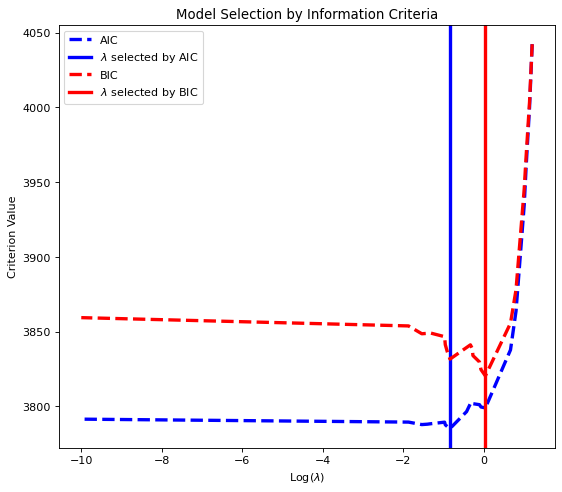

In [20]:
# Building graphs to display results from AIC and BIC
def plot_ic_criterion(model, name, color): 
    alpha_ = model.alpha_ + eps
    alphas_ = model.alphas_ + eps
    criterion_ = model.criterion_ # BIC or AIC values over the alpha values
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3,
                label='$\lambda$ selected by %s ' % name)
    plt.xlabel('Log($\lambda$)')
    plt.ylabel('Criterion Value')
    

plt.figure(figsize=(8, 7), dpi=80)
plot_ic_criterion(lasic_aic, 'AIC', 'b')
plot_ic_criterion(lasic_bic, 'BIC', 'r')
plt.legend()
plt.title('Model Selection by Information Criteria')
#plt.show()
plt.savefig('lasso.png')